In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 1. count years per zipcode 

In [2]:
df= pd.read_csv('CENTRALVALLEY_NO3N_conc_10_00_zipcoded.csv')

all_zipcodes = df['Zipcode'].unique()

years=[]


for  zipcode in all_zipcodes:
    temp_df= df[df['Zipcode']==zipcode]
    
    temp_years = []
    for date in temp_df['GM_SAMP_COLLECTION_DATE'].values:
       
        temp_years+=[int(date[-2:])]
     
    temp_years=np.unique(temp_years)
    
    temp_years=temp_years[(temp_years >= 90) | (temp_years <= 20)]
    years+=[len(temp_years)]



In [3]:
print(len(years))

131


# 2. convert zipcode boundaries to shapefile

In [4]:
# processing of raw data only has to be done once

# master_data = gpd.read_file('tl_2016_us_zcta510/tl_2016_us_zcta510.shp')
# master_data.head()

# zipcode_filtered= master_data[master_data['ZCTA5CE10'].astype(int).isin(all_zipcodes)]
# zipcode_filtered.to_file('zipcode_polygon.shp')

In [5]:
master_data = gpd.read_file('census_zipcode/central_valley_zip.shp')
master_data.head()

Zipcode                                           geometry
0   94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...
1   95669  POLYGON ((-87179.121 56293.050, -87172.122 562...
2   95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...
3   95974  POLYGON ((-160902.018 163396.734, -160934.773 ...
4   95979  POLYGON ((-229918.232 136775.281, -229954.603 ...

# 3. combine 1. and 2. into a dataframe

In [6]:
master_data['Total_unique_years']=np.nan

zip_dict = {all_zipcodes[i]:years[i] for i in range(len(years))}

for i in range(len(master_data)):
    zip_i= int(master_data.loc[i,'Zipcode'])
    if zip_i in zip_dict.keys():
        master_data.loc[i, 'Total_unique_years']= zip_dict[zip_i]
    
    

In [7]:
master_data.head()

Zipcode                                           geometry  \
0   94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...   
1   95669  POLYGON ((-87179.121 56293.050, -87172.122 562...   
2   95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...   
3   95974  POLYGON ((-160902.018 163396.734, -160934.773 ...   
4   95979  POLYGON ((-229918.232 136775.281, -229954.603 ...   

   Total_unique_years  
0                 NaN  
1                 NaN  
2                 2.0  
3                 NaN  
4                 NaN

# 4. plot background

In [8]:
central_valley_image= rasterio.open('Central_Valley.tif')
print(central_valley_image.crs)


EPSG:4326


(34.0, 41.0)

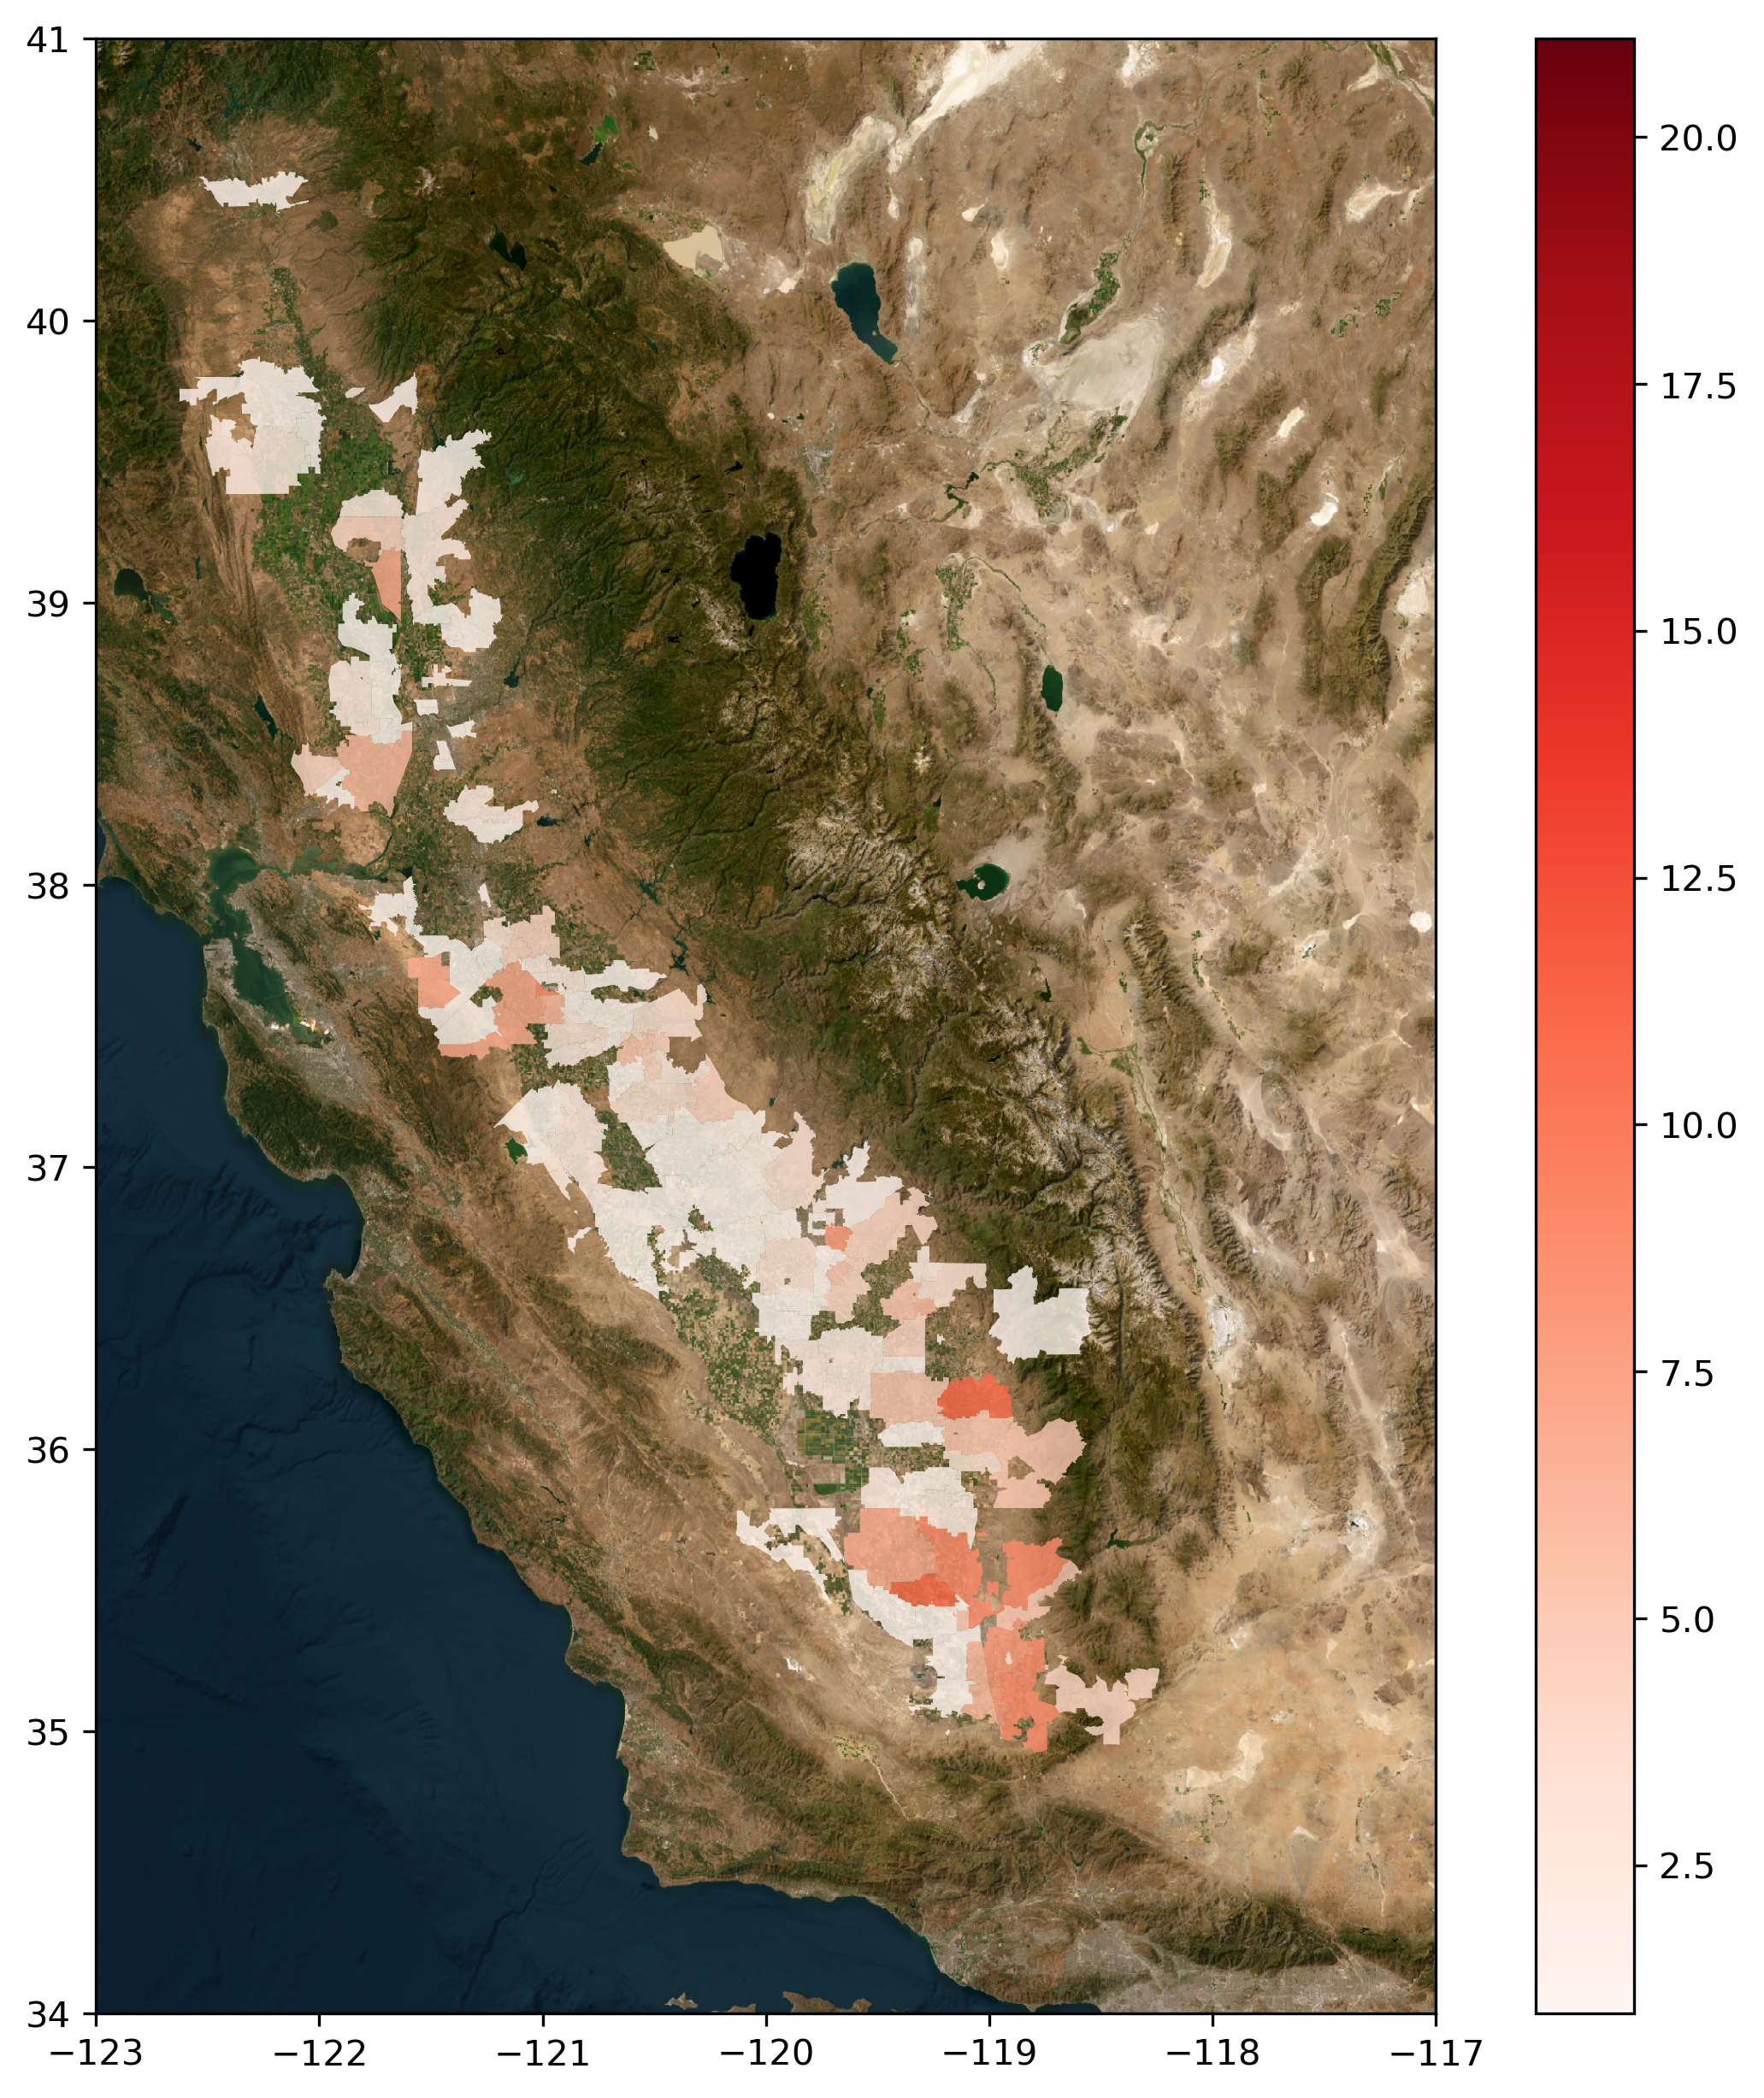

In [9]:
fig, ax=plt.subplots(figsize=(10,10), dpi= 300)
rasterio.plot.show(central_valley_image.read(), ax= ax,transform = central_valley_image.transform)
master_data.to_crs(central_valley_image.crs).plot('Total_unique_years', cmap='Reds', norm = mpl.colors.Normalize(vmin= 1, vmax=21.0),alpha=0.8,
                                                  legend= True, ax=ax)
plt.xlim(-123,-117)
plt.ylim(34,41)




